# Pre-processing

## SetUp

In [3]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
# 3rd Experiment
df=pd.read_csv("../data/prepared/cleaned_df_with_car_ranges_consumption.csv")
data=df.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23311 entries, 0 to 23310
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           23311 non-null  int64  
 1   manufacturer                         23311 non-null  object 
 2   model                                23311 non-null  object 
 3   year                                 23311 non-null  int64  
 4   version                              23311 non-null  object 
 5   power(kW)                            23311 non-null  float64
 6   fuel_date                            23311 non-null  object 
 7   odometer                             15034 non-null  float64
 8   trip_distance(km)                    23311 non-null  float64
 9   quantity(kWh)                        23311 non-null  float64
 10  fuel_type                            23311 non-null  object 
 11  tire_type                   

In [6]:
data.shape

(23311, 25)

In [7]:
data.head()

,Unnamed: 0,manufacturer,model,year,version,power(kW),fuel_date,odometer,trip_distance(km),quantity(kWh),...,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note,user_id,man_model_year_verion,actual quantity consumed per 100 km
0,465,Volkswagen,Golf,2018,e-Golf,100.0,17.01.2022,NaN,61.0,18.0,...,Normal,17.00,1,0,NaN,4.10,NaN,Tesla_Model_S_2015,Volkswagen Golf 2018 e-Golf,29.508197
1,255,Volkswagen,Golf,2018,e-Golf,100.0,08.07.2022,NaN,47.0,11.0,...,Normal,11.63,1,0,NaN,-1.27,NaN,Tesla_Model_S_2015,Volkswagen Golf 2018 e-Golf,23.404255
2,1264,Volkswagen,Golf,2018,e-Golf,100.0,05.12.2019,NaN,97.0,24.6,...,Normal,18.09,1,0,NaN,5.19,NaN,Tesla_Model_S_2015,Volkswagen Golf 2018 e-Golf,25.360825
3,522,Volkswagen,Golf,2018,e-Golf,100.0,07.12.2021,NaN,58.0,10.0,...,Normal,15.57,1,0,NaN,2.67,NaN,Tesla_Model_S_2015,Volkswagen Golf 2018 e-Golf,17.241379
4,715,Volkswagen,Golf,2018,e-Golf,100.0,22.06.2021,NaN,92.0,28.0,...,Normal,14.08,1,0,NaN,1.18,NaN,Tesla_Model_S_2015,Volkswagen Golf 2018 e-Golf,30.434783


In [8]:
distance_cal= data.copy()

In [9]:
data[['power(kW)', 'fuel_date',
       'odometer', 'trip_distance(km)', 'quantity(kWh)', 'fuel_type',
       'tire_type', 'city', 'motor_way', 'country_roads', 'driving_style',
       'consumption(kWh/100km)', 'A/C', 'park_heating', 'avg_speed(km/h)',
       'ecr_deviation', 'fuel_note', 'user_id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23311 entries, 0 to 23310
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               23311 non-null  float64
 1   fuel_date               23311 non-null  object 
 2   odometer                15034 non-null  float64
 3   trip_distance(km)       23311 non-null  float64
 4   quantity(kWh)           23311 non-null  float64
 5   fuel_type               23311 non-null  object 
 6   tire_type               23221 non-null  object 
 7   city                    23311 non-null  int64  
 8   motor_way               23311 non-null  int64  
 9   country_roads           23311 non-null  int64  
 10  driving_style           23200 non-null  object 
 11  consumption(kWh/100km)  23216 non-null  float64
 12  A/C                     23311 non-null  int64  
 13  park_heating            23311 non-null  int64  
 14  avg_speed(km/h)         4126 non-null 

In [10]:
data.columns

Index(['Unnamed: 0', 'manufacturer', 'model', 'year', 'version', 'power(kW)',
       'fuel_date', 'odometer', 'trip_distance(km)', 'quantity(kWh)',
       'fuel_type', 'tire_type', 'city', 'motor_way', 'country_roads',
       'driving_style', 'consumption(kWh/100km)', 'A/C', 'park_heating',
       'avg_speed(km/h)', 'ecr_deviation', 'fuel_note', 'user_id',
       'man_model_year_verion', 'actual quantity consumed per 100 km'],
      dtype='object')

In [11]:
# distance_cal['calculated_distance']=(np.array(distance_cal['quantity(kWh)'])/np.array(distance_cal['consumption(kWh/100km)']))*100

In [12]:
data['tire_type'].unique()

array(['All-year tires', 'Winter tires', 'Summer tires', nan],
      dtype=object)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23311 entries, 0 to 23310
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           23311 non-null  int64  
 1   manufacturer                         23311 non-null  object 
 2   model                                23311 non-null  object 
 3   year                                 23311 non-null  int64  
 4   version                              23311 non-null  object 
 5   power(kW)                            23311 non-null  float64
 6   fuel_date                            23311 non-null  object 
 7   odometer                             15034 non-null  float64
 8   trip_distance(km)                    23311 non-null  float64
 9   quantity(kWh)                        23311 non-null  float64
 10  fuel_type                            23311 non-null  object 
 11  tire_type                   

In [14]:
df=df.loc[df['trip_distance(km)']<=420.0,:]

In [15]:
df.shape

(23311, 25)

### Data for Hugging Face

In [16]:
# data_hug=data.copy()

In [17]:
# data_hug.columns

In [18]:
# data_hug.shape

In [19]:
# data_hug['man_model_year_verion']=data_hug['manufacturer']+' '+data_hug['model']+' '+data_hug['year']+' '+data_hug['version']
# data_hug_sel=data_hug.copy()
# data_hug_sel=data_hug_sel.loc[(data_hug_sel.man_model_year_verion!='Opel Ampera 2012 Ampera ePionier') &(data_hug_sel.man_model_year_verion!='Opel Ampera 2012 ePionier LithiumweiÃŸ Elektrischer Antrieb' ) ]



In [20]:
#data_hug_sel['man_model_year_verion'].value_counts()

In [21]:
# data_hug.shape

In [22]:
# data.isna().sum()

In [23]:
def convert_encodecategorical(data_sel):
     data_sel=data_sel.loc[(data_sel['driving_style']!='driving_style') & (data_sel['tire_type']!='tire_type'), :]
     data_sel.loc[:,'tire_type']=data_sel['tire_type'].map({'All-year tires':1,'Summer tires':3,'Winter tires':2, 'tire_type':0})
     data_sel.loc[:,'driving_style']=data_sel['driving_style'].map({'Fast':3,'Moderate':2,'Normal':1})
     
     return data_sel

def convert_to_numeric(columns,df):
    for col in columns:
        if col!='fuel_date':
           df.loc[:, col]=pd.to_numeric(df.loc[:,col], errors='coerce')
    return df

In [24]:
def convert_date(data_sel_num):
    data_sel_num['fuel_date']=data_sel_num['fuel_date'].astype('str')
    data_sel_num['fuel_date']=data_sel_num['fuel_date'].apply(lambda x :x.replace(".",'-'))
    data_sel_num['fuel_date_new']=pd.to_datetime(data_sel_num['fuel_date'], errors='coerce', format='%d-%m-%Y')
    # extracting month , day and day of the week from fuel_date
    data_sel_num['month']=data_sel_num['fuel_date_new'].dt.month
    data_sel_num['weekday']=data_sel_num['fuel_date_new'].dt.weekday
    data_sel_num['day']=data_sel_num['fuel_date_new'].dt.day
    data_sel_num.drop(columns=['fuel_date','fuel_date_new'], axis=1, inplace=True)
    return data_sel_num


In [25]:
# y=pd.DataFrame(data_hug.loc[:, 'trip_distance(km)'])
# X=data_hug.drop(columns='trip_distance(km)', axis=1)

## Data Spliting for Hugging Face

In [26]:
# X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.4,shuffle=True)
# X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,shuffle=True)

In [27]:
# X_train.head()

In [28]:
# y_train.head()

In [29]:
# X_val.head()

In [30]:
# y_val.head()

In [31]:
# X_test.head()

In [32]:
# y_test.head()

In [33]:
# hug_train=pd.concat([X_train, y_train], axis=1).sample(n=7000)
# hug_val=pd.concat([X_val,y_val]).sample(n=2000)
# hug_test=pd.concat([X_test,y_test], axis=1).sample(n=2000)

In [34]:
# print('train',hug_train.shape)
# print('test', hug_test.shape)
# print('val', hug_val.shape)

In [35]:
# hug_test.head()

In [36]:
# hug_train.head()

In [37]:
# hug_val.head()

In [38]:
# hug_train.isna().sum()

In [39]:
# hug_test.isna().sum()

In [40]:
# hug_train_sel=hug_train.copy()
# hug_test_sel=hug_test.copy()
# hug_val_sel=hug_val.copy()

In [41]:
# fetures_sel=['power(kW)', 'fuel_date', 'quantity(kWh)','avg_speed(km/h)',
#        'tire_type', 'city', 'motor_way', 'country_roads', 'driving_style',
#         'park_heating', 'consumption(kWh/100km)','trip_distance(km)']

In [42]:
# hug_train_sel=hug_train_sel[fetures_sel]
# hug_test_sel=hug_test_sel[fetures_sel]
# hug_val_sel=hug_val_sel[fetures_sel]

In [43]:
# print('train',hug_train_sel.isna().sum())


In [44]:
# print('test', hug_test_sel.isna().sum())


In [45]:
# print('val', hug_val_sel.isna().sum())

In [46]:
# hug_test_sel.dropna(inplace=True)
# hug_train_sel.dropna(inplace=True)


In [47]:
# hug_train_sel.isna().sum()

In [48]:
# hug_test_sel.isna().sum()

In [49]:
# hug_train.columns

In [50]:
# hug_train['driving_style'].value_counts()

In [51]:
# colums_for_num_cov=['power(kW)','quantity(kWh)','avg_speed(km/h)']
# hug_train_sel_num=convert_to_numeric(colums_for_num_cov, hug_train)
# hug_test_sel_num=convert_to_numeric(colums_for_num_cov,hug_test)
# hug_val_sel_num=convert_to_numeric(colums_for_num_cov,hug_val)


In [52]:
# hug_val_sel_num.info()

In [53]:
# hug_train_converted=convert_date(hug_train_sel_num.copy())
# hug_test_converted=convert_date(hug_test_sel_num.copy())
# hug_val_converted=convert_date(hug_val_sel_num.copy())

In [54]:
# hug_train_converted=convert_encodecategorical(hug_train_sel_num)
# hug_test_converted=convert_encodecategorical(hug_test_sel_num)

## Preprocessing_Models

In [55]:
df.shape

(23311, 25)

In [56]:
y=pd.DataFrame(df['trip_distance(km)'])
X=df.drop(columns=['trip_distance(km)'], axis=1)

In [57]:
X.columns

Index(['Unnamed: 0', 'manufacturer', 'model', 'year', 'version', 'power(kW)',
       'fuel_date', 'odometer', 'quantity(kWh)', 'fuel_type', 'tire_type',
       'city', 'motor_way', 'country_roads', 'driving_style',
       'consumption(kWh/100km)', 'A/C', 'park_heating', 'avg_speed(km/h)',
       'ecr_deviation', 'fuel_note', 'user_id', 'man_model_year_verion',
       'actual quantity consumed per 100 km'],
      dtype='object')

In [58]:
df.head()

,Unnamed: 0,manufacturer,model,year,version,power(kW),fuel_date,odometer,trip_distance(km),quantity(kWh),...,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note,user_id,man_model_year_verion,actual quantity consumed per 100 km
0,465,Volkswagen,Golf,2018,e-Golf,100.0,17.01.2022,NaN,61.0,18.0,...,Normal,17.00,1,0,NaN,4.10,NaN,Tesla_Model_S_2015,Volkswagen Golf 2018 e-Golf,29.508197
1,255,Volkswagen,Golf,2018,e-Golf,100.0,08.07.2022,NaN,47.0,11.0,...,Normal,11.63,1,0,NaN,-1.27,NaN,Tesla_Model_S_2015,Volkswagen Golf 2018 e-Golf,23.404255
2,1264,Volkswagen,Golf,2018,e-Golf,100.0,05.12.2019,NaN,97.0,24.6,...,Normal,18.09,1,0,NaN,5.19,NaN,Tesla_Model_S_2015,Volkswagen Golf 2018 e-Golf,25.360825
3,522,Volkswagen,Golf,2018,e-Golf,100.0,07.12.2021,NaN,58.0,10.0,...,Normal,15.57,1,0,NaN,2.67,NaN,Tesla_Model_S_2015,Volkswagen Golf 2018 e-Golf,17.241379
4,715,Volkswagen,Golf,2018,e-Golf,100.0,22.06.2021,NaN,92.0,28.0,...,Normal,14.08,1,0,NaN,1.18,NaN,Tesla_Model_S_2015,Volkswagen Golf 2018 e-Golf,30.434783


In [59]:
y=pd.DataFrame(df['trip_distance(km)'])
X=df.drop(columns='trip_distance(km)', axis=1)
X_train_model, X_test_model, y_train_model, y_test_model=train_test_split(X, y, test_size=0.4, shuffle=True)
train_data=pd.concat([X_train_model,y_train_model], axis=1)
test_data=pd.concat([X_test_model,y_test_model], axis=1)

# fetures_sel1=[ 'power(kW)', 'fuel_date', 'quantity(kWh)', 
#        'tire_type', 'city', 'motor_way', 'country_roads', 'driving_style',
#         'park_heating', 'avg_speed(km/h)',
#        'ecr_deviation','consumption(kWh/100km)','trip_distance(km)']

fetures_sel1=[ 'power(kW)','fuel_date', 'quantity(kWh)', 'odometer',
               'tire_type', 'city', 'motor_way', 'country_roads', 'driving_style',
               'consumption(kWh/100km)',  'A/C', 'park_heating',
                  'ecr_deviation','trip_distance(km)']

In [60]:
X_train_model.shape

(13986, 24)

In [61]:
X_test_model.shape

(9325, 24)

In [62]:
train_data=pd.concat([X_train_model,y_train_model], axis=1)
test_data=pd.concat([X_test_model,y_test_model], axis=1)

In [63]:
train_data.isna().sum()/train_data.shape[0]

Unnamed: 0                             0.000000
manufacturer                           0.000000
model                                  0.000000
year                                   0.000000
version                                0.000000
power(kW)                              0.000000
fuel_date                              0.000000
odometer                               0.354211
quantity(kWh)                          0.000000
fuel_type                              0.000000
tire_type                              0.003575
city                                   0.000000
motor_way                              0.000000
country_roads                          0.000000
driving_style                          0.004004
consumption(kWh/100km)                 0.004433
A/C                                    0.000000
park_heating                           0.000000
avg_speed(km/h)                        0.821035
ecr_deviation                          0.111683
fuel_note                              0

In [64]:
test_data.isna().sum()/test_data.shape[0]

Unnamed: 0                             0.000000
manufacturer                           0.000000
model                                  0.000000
year                                   0.000000
version                                0.000000
power(kW)                              0.000000
fuel_date                              0.000000
odometer                               0.356354
quantity(kWh)                          0.000000
fuel_type                              0.000000
tire_type                              0.004290
city                                   0.000000
motor_way                              0.000000
country_roads                          0.000000
driving_style                          0.005898
consumption(kWh/100km)                 0.003539
A/C                                    0.000000
park_heating                           0.000000
avg_speed(km/h)                        0.825952
ecr_deviation                          0.111099
fuel_note                              0

### 1. Feature Selection

In [65]:
# fetures_sel1=[ 'power(kW)', 'fuel_date', 'quantity(kWh)', 
#        'tire_type', 'city', 'motor_way', 'country_roads', 'driving_style',
#         'park_heating', 'avg_speed(km/h)',
#        'ecr_deviation','consumption(kWh/100km)','trip_distance(km)']

In [66]:
# fetures_sel2=[ 'power(kW)', 'fuel_date', 'quantity(kWh)', 
#        'tire_type', 'city', 'motor_way', 'country_roads', 'driving_style',
#         'park_heating', 
#        'ecr_deviation','consumption(kWh/100km)','trip_distance(km)']

In [67]:
train_model_sel=train_data[fetures_sel1]
test_model_sel=test_data[fetures_sel1]

In [68]:
train_model_sel.head()

,power(kW),fuel_date,quantity(kWh),odometer,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,ecr_deviation,trip_distance(km)
21365,132.0,27.06.2021,4.17,92487.0,Summer tires,1,0,1,Moderate,14.38,0,0,-2.22,29.0
7128,85.0,19.04.2018,15.80,51541.0,Summer tires,0,1,0,Moderate,12.50,0,1,-0.20,86.0
6821,85.0,19.04.2018,6.14,51637.0,Summer tires,1,1,0,Moderate,12.30,0,0,-0.40,76.0
15804,80.0,27.11.2019,1.60,NaN,All-year tires,0,0,0,Normal,14.60,0,0,-0.40,11.1
7666,80.0,31.10.2019,6.88,NaN,Summer tires,1,0,1,Normal,13.38,1,0,-1.62,50.0


In [69]:
def fillinMissingvalues(df, columns):
    for col in columns:
        print(df[col].dtypes)
        if df[col].dtypes=='float64':
            df[col].fillna(value=df[col].mean(), inplace=True)
        elif df[col].dtypes=='object':
            df[col].fillna(value=df[col].astype('str').mode(), inplace=True)
        elif df[col].dtypes=='int64':
            df[col].fillna(value=df[col].mode(), inplace=True)
    return df
            

### Fill Missing value

In [70]:
train_model_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13986 entries, 21365 to 12488
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               13986 non-null  float64
 1   fuel_date               13986 non-null  object 
 2   quantity(kWh)           13986 non-null  float64
 3   odometer                9032 non-null   float64
 4   tire_type               13936 non-null  object 
 5   city                    13986 non-null  int64  
 6   motor_way               13986 non-null  int64  
 7   country_roads           13986 non-null  int64  
 8   driving_style           13930 non-null  object 
 9   consumption(kWh/100km)  13924 non-null  float64
 10  A/C                     13986 non-null  int64  
 11  park_heating            13986 non-null  int64  
 12  ecr_deviation           12424 non-null  float64
 13  trip_distance(km)       13986 non-null  float64
dtypes: float64(6), int64(5), object(3)

In [71]:
test_model_sel.isna().any()

power(kW)                 False
fuel_date                 False
quantity(kWh)             False
odometer                   True
tire_type                  True
city                      False
motor_way                 False
country_roads             False
driving_style              True
consumption(kWh/100km)     True
A/C                       False
park_heating              False
ecr_deviation              True
trip_distance(km)         False
dtype: bool

In [72]:
train_model_sel.columns

Index(['power(kW)', 'fuel_date', 'quantity(kWh)', 'odometer', 'tire_type',
       'city', 'motor_way', 'country_roads', 'driving_style',
       'consumption(kWh/100km)', 'A/C', 'park_heating', 'ecr_deviation',
       'trip_distance(km)'],
      dtype='object')

In [73]:
columns=['consumption(kWh/100km)','ecr_deviation', 'tire_type', ] 
train_data=fillinMissingvalues(train_model_sel, columns)               
test_data=fillinMissingvalues(test_model_sel, columns)

float64
float64
object
float64
float64
object


/usr/lib/python3/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [74]:
train_data.isna().sum()


power(kW)                    0
fuel_date                    0
quantity(kWh)                0
odometer                  4954
tire_type                   50
city                         0
motor_way                    0
country_roads                0
driving_style               56
consumption(kWh/100km)       0
A/C                          0
park_heating                 0
ecr_deviation                0
trip_distance(km)            0
dtype: int64

In [75]:
test_data.isna().sum()

power(kW)                    0
fuel_date                    0
quantity(kWh)                0
odometer                  3323
tire_type                   40
city                         0
motor_way                    0
country_roads                0
driving_style               55
consumption(kWh/100km)       0
A/C                          0
park_heating                 0
ecr_deviation                0
trip_distance(km)            0
dtype: int64

In [76]:
train_data['tire_type'].fillna(value=train_data['tire_type'].mode(), inplace=True)
test_data['tire_type'].fillna(value=test_data['tire_type'].mode(), inplace=True)

In [77]:
train_data['driving_style'].fillna(value=train_data['driving_style'].mode(), inplace=True)
test_data['driving_style'].fillna(value=test_data['driving_style'].mode(), inplace=True)

In [78]:
train_data.isna().sum()


power(kW)                    0
fuel_date                    0
quantity(kWh)                0
odometer                  4954
tire_type                   50
city                         0
motor_way                    0
country_roads                0
driving_style               56
consumption(kWh/100km)       0
A/C                          0
park_heating                 0
ecr_deviation                0
trip_distance(km)            0
dtype: int64

In [79]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9325 entries, 22245 to 6446
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               9325 non-null   float64
 1   fuel_date               9325 non-null   object 
 2   quantity(kWh)           9325 non-null   float64
 3   odometer                6002 non-null   float64
 4   tire_type               9285 non-null   object 
 5   city                    9325 non-null   int64  
 6   motor_way               9325 non-null   int64  
 7   country_roads           9325 non-null   int64  
 8   driving_style           9270 non-null   object 
 9   consumption(kWh/100km)  9325 non-null   float64
 10  A/C                     9325 non-null   int64  
 11  park_heating            9325 non-null   int64  
 12  ecr_deviation           9325 non-null   float64
 13  trip_distance(km)       9325 non-null   float64
dtypes: float64(6), int64(5), object(3)
m

### 2. Data type Conversion

In [80]:
#colums_for_num_cov=['power(kW)','quantity(kWh)','avg_speed(km/h)','ecr_deviation']

colums_for_num_cov=['power(kW)','quantity(kWh)','ecr_deviation', 'trip_distance(km)']
train_model_num=convert_to_numeric(colums_for_num_cov, train_model_sel)
test_model_num=convert_to_numeric(colums_for_num_cov, test_model_sel)

In [81]:
print(train_model_num.shape)
print(test_model_num.shape)

(13986, 14)
(9325, 14)


In [82]:
# train_model_cat=convert_encodecategorical(train_model_num)
# test_model_cat=convert_encodecategorical(test_model_num)

train_model_cat=convert_encodecategorical(train_data)
test_model_cat=convert_encodecategorical(test_data)

In [83]:
print(train_model_num.shape)
print(test_model_num.shape)

(13986, 14)
(9325, 14)


In [84]:
train_model_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13986 entries, 21365 to 12488
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               13986 non-null  float64
 1   fuel_date               13986 non-null  object 
 2   quantity(kWh)           13986 non-null  float64
 3   odometer                9032 non-null   float64
 4   tire_type               13936 non-null  float64
 5   city                    13986 non-null  int64  
 6   motor_way               13986 non-null  int64  
 7   country_roads           13986 non-null  int64  
 8   driving_style           13930 non-null  float64
 9   consumption(kWh/100km)  13986 non-null  float64
 10  A/C                     13986 non-null  int64  
 11  park_heating            13986 non-null  int64  
 12  ecr_deviation           13986 non-null  float64
 13  trip_distance(km)       13986 non-null  float64
dtypes: float64(8), int64(5), object(1)

In [85]:
test_model_cat.head()

,power(kW),fuel_date,quantity(kWh),odometer,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,ecr_deviation,trip_distance(km)
22245,278.0,02.01.2020,8.00,108361.0,2.0,1,0,1,1.0,27.20,0,0,11.100000,21.0
1583,278.0,30.11.2019,9.00,107079.0,2.0,1,0,0,1.0,24.24,0,0,8.140000,6.0
16755,88.0,19.11.2019,15.75,39686.0,3.0,1,1,1,2.0,12.88,0,0,2.332115,122.3
19593,35.0,29.08.2016,6.30,76835.0,2.0,1,0,1,1.0,14.65,1,0,2.150000,43.0
7805,80.0,18.10.2019,2.64,21983.0,3.0,1,0,1,1.0,13.38,1,0,-1.620000,96.0


In [86]:
train_model_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13986 entries, 21365 to 12488
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               13986 non-null  float64
 1   fuel_date               13986 non-null  object 
 2   quantity(kWh)           13986 non-null  float64
 3   odometer                9032 non-null   float64
 4   tire_type               13936 non-null  float64
 5   city                    13986 non-null  int64  
 6   motor_way               13986 non-null  int64  
 7   country_roads           13986 non-null  int64  
 8   driving_style           13930 non-null  float64
 9   consumption(kWh/100km)  13986 non-null  float64
 10  A/C                     13986 non-null  int64  
 11  park_heating            13986 non-null  int64  
 12  ecr_deviation           13986 non-null  float64
 13  trip_distance(km)       13986 non-null  float64
dtypes: float64(8), int64(5), object(1)

In [87]:
test_model_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9325 entries, 22245 to 6446
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               9325 non-null   float64
 1   fuel_date               9325 non-null   object 
 2   quantity(kWh)           9325 non-null   float64
 3   odometer                6002 non-null   float64
 4   tire_type               9285 non-null   float64
 5   city                    9325 non-null   int64  
 6   motor_way               9325 non-null   int64  
 7   country_roads           9325 non-null   int64  
 8   driving_style           9270 non-null   float64
 9   consumption(kWh/100km)  9325 non-null   float64
 10  A/C                     9325 non-null   int64  
 11  park_heating            9325 non-null   int64  
 12  ecr_deviation           9325 non-null   float64
 13  trip_distance(km)       9325 non-null   float64
dtypes: float64(8), int64(5), object(1)
m

### 3. Tranform Fuel Date

In [88]:
train_converted=convert_date(train_model_cat.copy())
test_converted=convert_date(test_model_cat.copy())

In [89]:
print(train_converted.shape)
print(test_converted.shape)

(13986, 16)
(9325, 16)


In [90]:
test_converted.head()

,power(kW),quantity(kWh),odometer,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,ecr_deviation,trip_distance(km),month,weekday,day
22245,278.0,8.00,108361.0,2.0,1,0,1,1.0,27.20,0,0,11.100000,21.0,1,3,2
1583,278.0,9.00,107079.0,2.0,1,0,0,1.0,24.24,0,0,8.140000,6.0,11,5,30
16755,88.0,15.75,39686.0,3.0,1,1,1,2.0,12.88,0,0,2.332115,122.3,11,1,19
19593,35.0,6.30,76835.0,2.0,1,0,1,1.0,14.65,1,0,2.150000,43.0,8,0,29
7805,80.0,2.64,21983.0,3.0,1,0,1,1.0,13.38,1,0,-1.620000,96.0,10,4,18


In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
data=pd.concat([train_converted,test_converted], axis=0)

In [93]:
data.columns

Index(['power(kW)', 'quantity(kWh)', 'odometer', 'tire_type', 'city',
       'motor_way', 'country_roads', 'driving_style', 'consumption(kWh/100km)',
       'A/C', 'park_heating', 'ecr_deviation', 'trip_distance(km)', 'month',
       'weekday', 'day'],
      dtype='object')

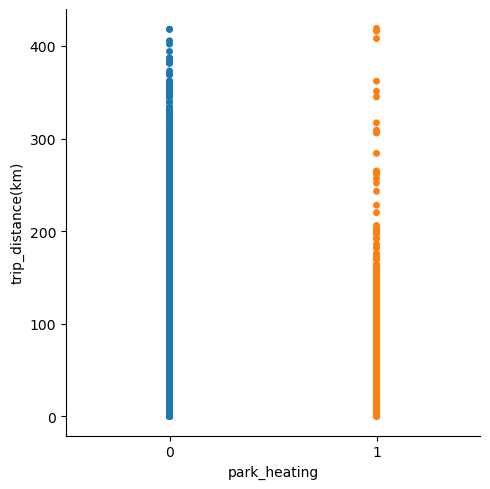

In [94]:
sns.catplot(data=data, x="park_heating", y="trip_distance(km)", jitter=False,hue='park_heating')

 ### 5. Filling Missing values

In [95]:
train_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13986 entries, 21365 to 12488
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               13986 non-null  float64
 1   quantity(kWh)           13986 non-null  float64
 2   odometer                9032 non-null   float64
 3   tire_type               13936 non-null  float64
 4   city                    13986 non-null  int64  
 5   motor_way               13986 non-null  int64  
 6   country_roads           13986 non-null  int64  
 7   driving_style           13930 non-null  float64
 8   consumption(kWh/100km)  13986 non-null  float64
 9   A/C                     13986 non-null  int64  
 10  park_heating            13986 non-null  int64  
 11  ecr_deviation           13986 non-null  float64
 12  trip_distance(km)       13986 non-null  float64
 13  month                   13986 non-null  int64  
 14  weekday                 13986 non-

In [96]:
train_converted.isna().sum()

power(kW)                    0
quantity(kWh)                0
odometer                  4954
tire_type                   50
city                         0
motor_way                    0
country_roads                0
driving_style               56
consumption(kWh/100km)       0
A/C                          0
park_heating                 0
ecr_deviation                0
trip_distance(km)            0
month                        0
weekday                      0
day                          0
dtype: int64

In [97]:
test_converted.isna().sum()

power(kW)                    0
quantity(kWh)                0
odometer                  3323
tire_type                   40
city                         0
motor_way                    0
country_roads                0
driving_style               55
consumption(kWh/100km)       0
A/C                          0
park_heating                 0
ecr_deviation                0
trip_distance(km)            0
month                        0
weekday                      0
day                          0
dtype: int64

In [98]:
columns=['trip_distance(km)'] 
train_converted=fillinMissingvalues(train_converted, columns)               
test_converted=fillinMissingvalues(test_converted, columns)

float64
float64


In [99]:
print(train_converted.shape)
print(test_converted.shape)

(13986, 16)
(9325, 16)


In [100]:
train_converted.isna().sum()

power(kW)                    0
quantity(kWh)                0
odometer                  4954
tire_type                   50
city                         0
motor_way                    0
country_roads                0
driving_style               56
consumption(kWh/100km)       0
A/C                          0
park_heating                 0
ecr_deviation                0
trip_distance(km)            0
month                        0
weekday                      0
day                          0
dtype: int64

In [101]:
test_converted.isna().sum()

power(kW)                    0
quantity(kWh)                0
odometer                  3323
tire_type                   40
city                         0
motor_way                    0
country_roads                0
driving_style               55
consumption(kWh/100km)       0
A/C                          0
park_heating                 0
ecr_deviation                0
trip_distance(km)            0
month                        0
weekday                      0
day                          0
dtype: int64

In [102]:
print(train_converted.shape)
print(test_converted.shape)

(13986, 16)
(9325, 16)


In [103]:
test_converted['tire_type'].fillna(value=test_converted['tire_type'].mode(), inplace=True)
test_converted['driving_style'].fillna(value=test_converted['driving_style'].mode(), inplace=True)



In [104]:
train_converted['tire_type'].fillna(value=train_converted['tire_type'].mode(), inplace=True)
train_converted['driving_style'].fillna(value=train_converted['driving_style'].mode(), inplace=True)


In [105]:
train_converted.isna().sum()

power(kW)                    0
quantity(kWh)                0
odometer                  4954
tire_type                   50
city                         0
motor_way                    0
country_roads                0
driving_style               56
consumption(kWh/100km)       0
A/C                          0
park_heating                 0
ecr_deviation                0
trip_distance(km)            0
month                        0
weekday                      0
day                          0
dtype: int64

In [106]:
test_converted.isna().sum()

power(kW)                    0
quantity(kWh)                0
odometer                  3323
tire_type                   40
city                         0
motor_way                    0
country_roads                0
driving_style               55
consumption(kWh/100km)       0
A/C                          0
park_heating                 0
ecr_deviation                0
trip_distance(km)            0
month                        0
weekday                      0
day                          0
dtype: int64

In [107]:
train_model_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13986 entries, 21365 to 12488
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               13986 non-null  float64
 1   fuel_date               13986 non-null  object 
 2   quantity(kWh)           13986 non-null  float64
 3   odometer                9032 non-null   float64
 4   tire_type               13936 non-null  float64
 5   city                    13986 non-null  int64  
 6   motor_way               13986 non-null  int64  
 7   country_roads           13986 non-null  int64  
 8   driving_style           13930 non-null  float64
 9   consumption(kWh/100km)  13986 non-null  float64
 10  A/C                     13986 non-null  int64  
 11  park_heating            13986 non-null  int64  
 12  ecr_deviation           13986 non-null  float64
 13  trip_distance(km)       13986 non-null  float64
dtypes: float64(8), int64(5), object(1)

In [108]:
test_model_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9325 entries, 22245 to 6446
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   power(kW)               9325 non-null   float64
 1   fuel_date               9325 non-null   object 
 2   quantity(kWh)           9325 non-null   float64
 3   odometer                6002 non-null   float64
 4   tire_type               9285 non-null   float64
 5   city                    9325 non-null   int64  
 6   motor_way               9325 non-null   int64  
 7   country_roads           9325 non-null   int64  
 8   driving_style           9270 non-null   float64
 9   consumption(kWh/100km)  9325 non-null   float64
 10  A/C                     9325 non-null   int64  
 11  park_heating            9325 non-null   int64  
 12  ecr_deviation           9325 non-null   float64
 13  trip_distance(km)       9325 non-null   float64
dtypes: float64(8), int64(5), object(1)
m

In [109]:
train_converted.dropna(inplace=True)
test_converted.dropna(inplace=True)

In [110]:
print(train_converted.shape)
print(test_converted.shape)

(8941, 16)
(5923, 16)


In [111]:
train_converted_copy=train_converted.copy()

In [112]:
test_converted_copy=test_converted.copy()

In [113]:
train_converted_copy.drop(columns='odometer',axis=1)
test_converted_copy.drop(columns='odometer',axis=1)

,power(kW),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,ecr_deviation,trip_distance(km),month,weekday,day
22245,278.0,8.00,2.0,1,0,1,1.0,27.20,0,0,11.100000,21.0,1,3,2
1583,278.0,9.00,2.0,1,0,0,1.0,24.24,0,0,8.140000,6.0,11,5,30
16755,88.0,15.75,3.0,1,1,1,2.0,12.88,0,0,2.332115,122.3,11,1,19
19593,35.0,6.30,2.0,1,0,1,1.0,14.65,1,0,2.150000,43.0,8,0,29
7805,80.0,2.64,3.0,1,0,1,1.0,13.38,1,0,-1.620000,96.0,10,4,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9212,49.0,3.47,3.0,0,1,1,1.0,10.88,0,0,-2.620000,31.9,10,6,21
8065,80.0,1.00,3.0,1,0,1,1.0,13.38,1,0,-1.620000,9.0,11,1,5
21343,132.0,4.83,3.0,1,0,0,2.0,24.04,0,0,7.440000,63.0,4,2,6
22620,278.0,32.00,3.0,1,1,0,1.0,19.21,0,0,3.110000,126.0,6,1,11


In [114]:
train_converted_copy.dropna(axis=0,inplace=True)


In [115]:
test_converted_copy.dropna(axis=0, inplace=True)

In [116]:
train_converted_copy.isna().sum()

power(kW)                 0
quantity(kWh)             0
odometer                  0
tire_type                 0
city                      0
motor_way                 0
country_roads             0
driving_style             0
consumption(kWh/100km)    0
A/C                       0
park_heating              0
ecr_deviation             0
trip_distance(km)         0
month                     0
weekday                   0
day                       0
dtype: int64

In [117]:
test_converted_copy.isna().sum()

power(kW)                 0
quantity(kWh)             0
odometer                  0
tire_type                 0
city                      0
motor_way                 0
country_roads             0
driving_style             0
consumption(kWh/100km)    0
A/C                       0
park_heating              0
ecr_deviation             0
trip_distance(km)         0
month                     0
weekday                   0
day                       0
dtype: int64

In [118]:

train_converted.shape

(8941, 16)

In [119]:
test_converted.shape

(5923, 16)

In [120]:
test_converted_copy.shape

(5923, 16)

In [121]:
train_converted_copy.shape

(8941, 16)

In [122]:
# Experiment 1
# train_converted.to_csv('../data/preprocessed/train_converted.csv')
# test_converted.to_csv('../data/preprocessed/test_converted.csv')

#Experiment 3
# train_converted.to_csv('../data/preprocessed/df_range_consumption_train_data.csv')
# test_converted.to_csv('../data/preprocessed/df_range_consumption_test_data.csv')

In [123]:
# Experiment 3

train_converted.to_csv('../data/preprocessed/df_range_consumption_train_data_030923.csv')
test_converted.to_csv('../data/preprocessed/df_range_consumption_test_data_030923.csv')

In [124]:
# hug_test_clip.to_csv('../data/preprocessed/huggingface_test.csv')
# hug_train_clip.to_csv('../data/preprocessed/huggingface_train.csv')